### Imports

In [11]:
%load_ext autoreload
%autoreload 2

import os
os.environ['OPENBLAS_NUM_THREADS'] = '16'  
from os.path import join
import numpy as np
from tqdm import tqdm
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt


import MAS_library as MASL
import Pk_library as PKL
import redshift_space_library as RSL
from omegaconf import OmegaConf
import h5py

os.chdir('/home/x-mho1/git/ltu-cmass')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
wdir = '/anvil/scratch/x-mho1/cmass-ili'

## Halo catalog inference

### Load training and test data

In [13]:
def get_cosmo(source_path):
    cfg = OmegaConf.load(join(source_path, 'config.yaml'))
    return np.array(cfg.nbody.cosmo)

def get_halo_Pk(source_path, a):
    diag_file = join(source_path, 'diag', 'halos.h5')
    if not os.path.exists(diag_file):
        return None, None, None
    with h5py.File(diag_file, 'r') as f:
        # a = list(f.keys())[4]
        if a not in f.keys():
            print(f'{a} not in {f.keys()}')
            return None, None, None
        k = f[a]['Pk_k'][:]
        Pk = f[a]['Pk'][:]
    cosmo = get_cosmo(source_path)
    return k, Pk, cosmo

In [4]:
# Training suite
suite = 'abacuslike'
sim = 'fastpm'
L, N = 2000, 256

from cmass.utils import get_source_path

suite_path = get_source_path(wdir, suite, sim, L, N, 0)[:-2]


ktrain, Pktrain, cosmotrain = [], [], []
for lhid in tqdm(os.listdir(suite_path)):
    k, Pk, cosmo = get_halo_Pk(join(suite_path, lhid), '0.666660')
    ktrain.append(k)
    Pktrain.append(Pk)
    cosmotrain.append(cosmo)

ktrain, Pktrain, cosmotrain = map(lambda x: [i for i in x if i is not None], [ktrain, Pktrain, cosmotrain])
ktrain, Pktrain, cosmotrain = map(np.stack, [ktrain, Pktrain, cosmotrain])
print(ktrain.shape, Pktrain.shape, cosmotrain.shape)

  2%|▏         | 47/2000 [00:00<00:22, 87.36it/s]

0.666660 not in <KeysViewHDF5 ['0.586220', '0.606330', '0.626440']>


  4%|▍         | 76/2000 [00:00<00:21, 89.77it/s]

0.666660 not in <KeysViewHDF5 ['0.586220', '0.606330', '0.626440']>


  7%|▋         | 146/2000 [00:01<00:19, 93.27it/s]

0.666660 not in <KeysViewHDF5 ['0.769231']>


 12%|█▏        | 237/2000 [00:02<00:19, 92.38it/s]

0.666660 not in <KeysViewHDF5 ['0.769231']>


 15%|█▌        | 307/2000 [00:03<00:17, 94.18it/s]

0.666660 not in <KeysViewHDF5 ['0.769231']>


 17%|█▋        | 338/2000 [00:03<00:17, 94.93it/s]

0.666660 not in <KeysViewHDF5 ['0.586220', '0.606330']>


 20%|██        | 408/2000 [00:04<00:16, 93.90it/s]

0.666660 not in <KeysViewHDF5 ['0.769231']>


 28%|██▊       | 550/2000 [00:06<00:15, 93.04it/s]

0.666660 not in <KeysViewHDF5 ['0.769231']>


 30%|███       | 601/2000 [00:06<00:14, 94.43it/s]

0.666660 not in <KeysViewHDF5 ['0.769231']>


 35%|███▍      | 692/2000 [00:07<00:13, 95.98it/s]

0.666660 not in <KeysViewHDF5 ['0.586220', '0.606330']>


 39%|███▊      | 774/2000 [00:08<00:12, 100.08it/s]

0.666660 not in <KeysViewHDF5 ['0.769231']>
0.666660 not in <KeysViewHDF5 ['0.586220', '0.606330']>


 43%|████▎     | 856/2000 [00:09<00:11, 97.08it/s] 

0.666660 not in <KeysViewHDF5 ['0.769231']>


 45%|████▍     | 898/2000 [00:09<00:11, 98.94it/s]

0.666660 not in <KeysViewHDF5 ['0.769231']>


 47%|████▋     | 949/2000 [00:10<00:10, 99.02it/s]

0.666660 not in <KeysViewHDF5 ['0.586220', '0.606330']>


 50%|████▉     | 991/2000 [00:10<00:10, 100.75it/s]

0.666660 not in <KeysViewHDF5 ['0.769231']>
0.666660 not in <KeysViewHDF5 ['0.586220', '0.606330', '0.626440']>


 82%|████████▏ | 1634/2000 [00:17<00:03, 97.22it/s]

0.666660 not in <KeysViewHDF5 ['0.769231']>


 97%|█████████▋| 1935/2000 [00:20<00:00, 98.19it/s]

0.666660 not in <KeysViewHDF5 ['0.769231']>


100%|██████████| 2000/2000 [00:21<00:00, 94.39it/s]


(1978, 221) (1978, 221, 3) (1978, 5)


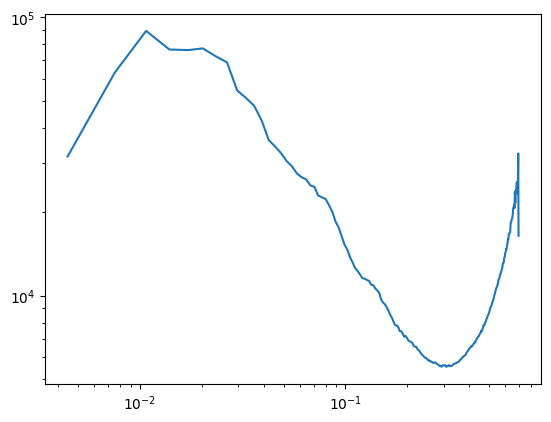

In [5]:
k, Pk, cosmo = get_halo_Pk(join(suite_path, str(100)), '0.666660')
plt.loglog(k, Pk[:,0])

In [6]:
# Test suite
suite = 'abacus'
sim = 'nbody'
L, N = 2000, 256

from cmass.utils import get_source_path

suite_path = get_source_path(wdir, suite, sim, L, N, 0, check=False)[:-2]


ktest, Pktest, cosmotest = [], [], []
for lhid in tqdm(os.listdir(suite_path)):
    k, Pk, cosmo = get_halo_Pk(join(suite_path, lhid), '0.666667')
    ktest.append(k)
    Pktest.append(Pk)
    cosmotest.append(cosmo)

ktest, Pktest, cosmotest = map(lambda x: [i for i in x if i is not None], [ktest, Pktest, cosmotest])
ktest, Pktest, cosmotest = map(np.stack, [ktest, Pktest, cosmotest])
print(ktest.shape, Pktest.shape, cosmotest.shape)

100%|██████████| 52/52 [00:01<00:00, 33.81it/s]

(52, 221) (52, 221, 3) (52, 5)


In [7]:
cosmotest[:,0] /= (cosmotest[:,2]**2)  # correct for h^2
cosmotest[:,1] /= (cosmotest[:,2]**2)  # correct for h^2

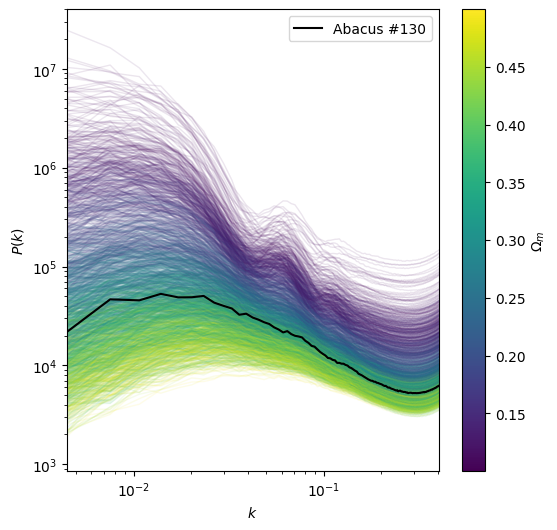

In [14]:
l = 0

f, ax = plt.subplots(figsize=(6,6))
cmap = plt.get_cmap('viridis')
Om = cosmotrain[:,0]
omnorm = (Om-Om.min())/(Om.max()-Om.min())
for i, (k, Pk, cosmo) in enumerate(zip(ktrain, Pktrain[...,0], Om)):
    ax.loglog(k, Pk, lw=1, alpha=0.1, color=cmap(omnorm[i]))
ax.loglog(ktest[l], Pktest[l,...,0], 'k', label='Abacus #130')
ax.set(xlabel='$k$', ylabel='$P(k)$')
nyq = np.pi*256/2000
ax.set_xlim(k.min(), nyq)
plt.legend()

norm = mpl.colors.Normalize(vmin=Om.min(), vmax=Om.max())
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm, ax=ax, label=r'$\Omega_m$')

In [10]:
cosmotest.shape

(52, 5)

### Train

In [15]:
import ili
from ili.dataloaders import NumpyLoader
from ili.inference import InferenceRunner
from ili.validation.metrics import PosteriorCoverage, PlotSinglePosterior, PosteriorSamples
from ili.embedding import FCN
device='cpu'

def run_inference(x, theta):
    loader = NumpyLoader(x=x, theta=theta)

    # define a prior
    prior = ili.utils.Uniform(
        low=theta.min(axis=0),
        high=theta.max(axis=0),
        device=device)

    embedding = FCN(n_hidden=[128, 64, 32, 16], act_fn='ReLU')

    # instantiate your neural networks to be used as an ensemble
    nets = [
        ili.utils.load_nde_lampe(
            model='nsf', hidden_features=50, num_transforms=5,
            embedding_net=embedding),
        # ili.utils.load_nde_lampe(model='gf', hidden_features=50, num_transforms=5)
    ]

    # define training arguments
    train_args = {
        'training_batch_size': 64,
        'learning_rate': 1e-5
    }

    # initialize the trainer
    runner = InferenceRunner.load(
        backend='lampe',
        engine='NPE',
        prior=prior,
        nets=nets,
        device=device,
        train_args=train_args
    )

    # train the model
    posterior_ensemble, summaries = runner(loader=loader)

    return posterior_ensemble, summaries

In [16]:
# train at different resolutions
kmaxs = [0.4] # [0.1, 0.2, 0.4, 0.6]

# impute with mean
def impute(arr):
    # Compute the mean of each row, ignoring nan values
    col_mean = np.nanmean(arr, axis=1)
    
    # Find the indices where values are nan
    inds = np.where(np.isnan(arr))
    
    # Replace nan values with the mean of the respective column
    arr[inds] = np.take(col_mean, inds[0])
    return arr

In [17]:
posteriors, summaries = {}, {}
for kmax in kmaxs:
    print(f'Training for kmax={kmax}')

    # focus on the monopole
    x = Pktrain[:, :, 0]

    # cut on k
    mask = ktrain[0] < kmax
    x = x[:, mask]
    theta = cosmotrain

    # log
    x = np.log10(x)

    # # impute
    # x = impute(x)

    # train
    _p, _s = run_inference(x, theta)
    posteriors[kmax] = _p
    summaries[kmax] = _s


INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.


Training for kmax=0.4


11 epochs [01:16,  7.00s/ epochs, loss=-5.95, loss_val=-6.03]


KeyboardInterrupt: 

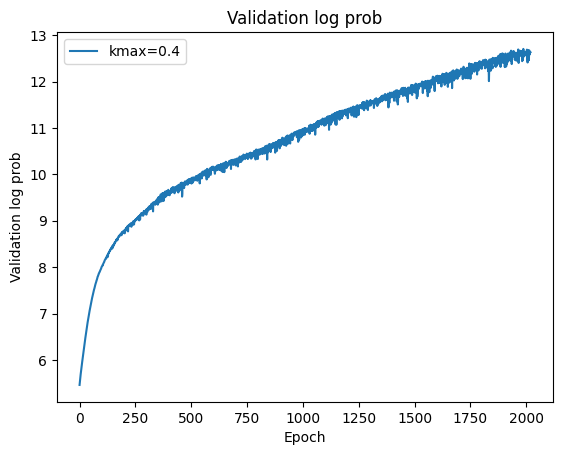

In [81]:
# plot loss functions
f, ax = plt.subplots()
for kmax in kmaxs:
    ax.plot(summaries[kmax][0]['validation_log_probs'], label=f'kmax={kmax}')
ax.set(xlabel='Epoch', ylabel='Validation log prob', title='Validation log prob')
ax.legend()

### Plot

In [82]:
# kmax = 0.25
_p = posteriors[kmax]
xobs = Pktest[:, :, 0]
mask = ktest[0] < kmax
xobs = xobs[:, mask]
xobs = np.log10(xobs)
# xobs = impute(xobs)
i = 10
xobs[i], cosmotest[i]

(array([4.41528456, 4.72454371, 4.73719717, 4.78037103, 4.74928165,
        4.74441153, 4.75827448, 4.68241137, 4.64887059, 4.61915326,
        4.55092191, 4.56402525, 4.52729785, 4.50379689, 4.48333362,
        4.46685219, 4.43538824, 4.41322242, 4.38303995, 4.39639456,
        4.36593498, 4.34731865, 4.33595856, 4.32100662, 4.28721569,
        4.26249571, 4.23509148, 4.22369676, 4.19633325, 4.17025979,
        4.15361042, 4.13840125, 4.12341791, 4.11707914, 4.10458891,
        4.10183657, 4.08059383, 4.07751054, 4.06971868, 4.06948694,
        4.05291901, 4.04322228, 4.0246977 , 4.0164465 , 4.00130017,
        3.9871005 , 3.97835812, 3.95743083, 3.95060381, 3.94167319,
        3.93448143, 3.92882215, 3.91970197, 3.91128572, 3.90701081,
        3.90071405, 3.89974617, 3.88829669, 3.88710959, 3.87945853,
        3.87277957, 3.86762916, 3.86268831, 3.85680283, 3.84852331,
        3.84241254, 3.84224418, 3.83336777, 3.82720142, 3.83058254,
        3.82122594, 3.81639173, 3.81667229, 3.81

INFO:root:Sampling models with tensor([1000.]) samples each.
Drawing 1000 posterior samples: 1811it [00:01, 1036.91it/s]                        


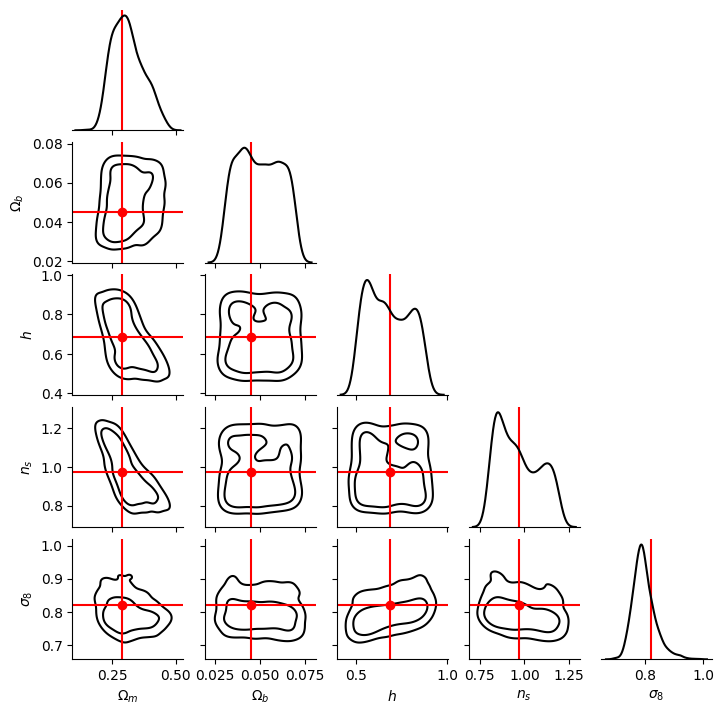

In [83]:
metric = PlotSinglePosterior(
    num_samples=1000, sample_method='direct',
    labels=[r'$\Omega_m$', r'$\Omega_b$', r'$h$', r'$n_s$', r'$\sigma_8$']
)
fig = metric(
    posterior=_p,
    x_obs = xobs[10], theta_fid = cosmotest[10],
    grid=None,
    name=f'kmax={kmax}'
)
fig.fig.set_size_inches(7, 7)

100%|██████████| 52/52 [00:28<00:00,  1.81it/s]
INFO:root:Mean logprob: 1.3942e+00Median logprob: 8.6217e+00
100%|██████████| 100/100 [00:00<00:00, 276.79it/s]
INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


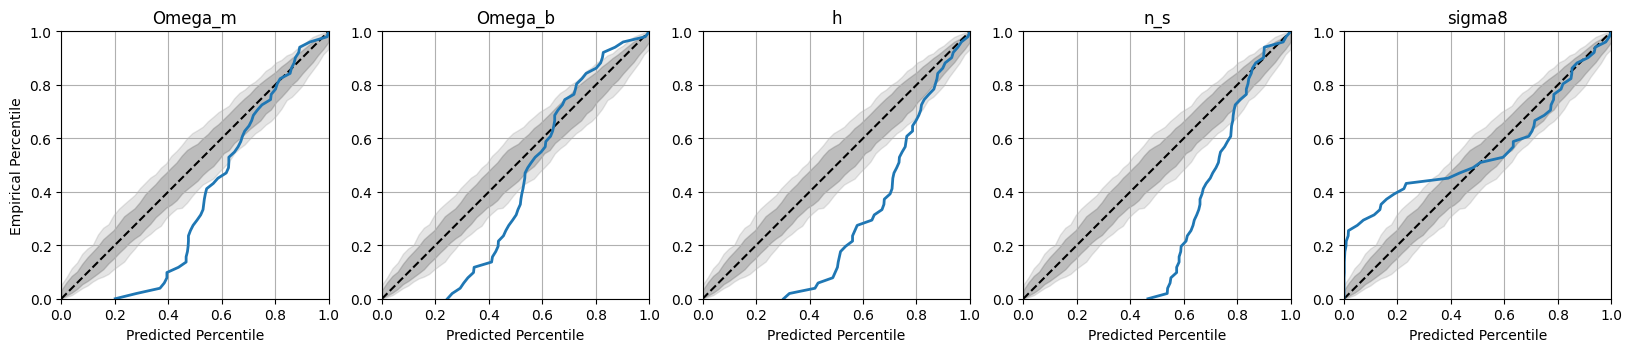

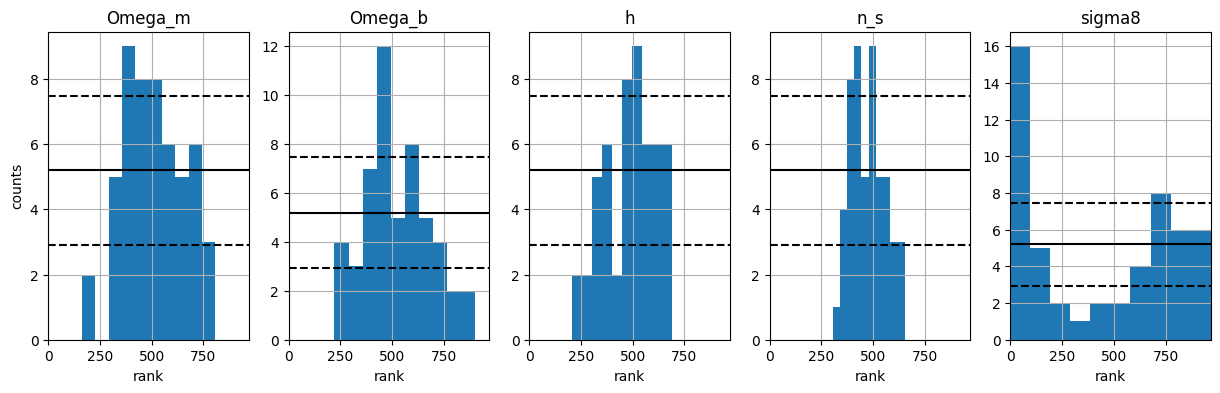

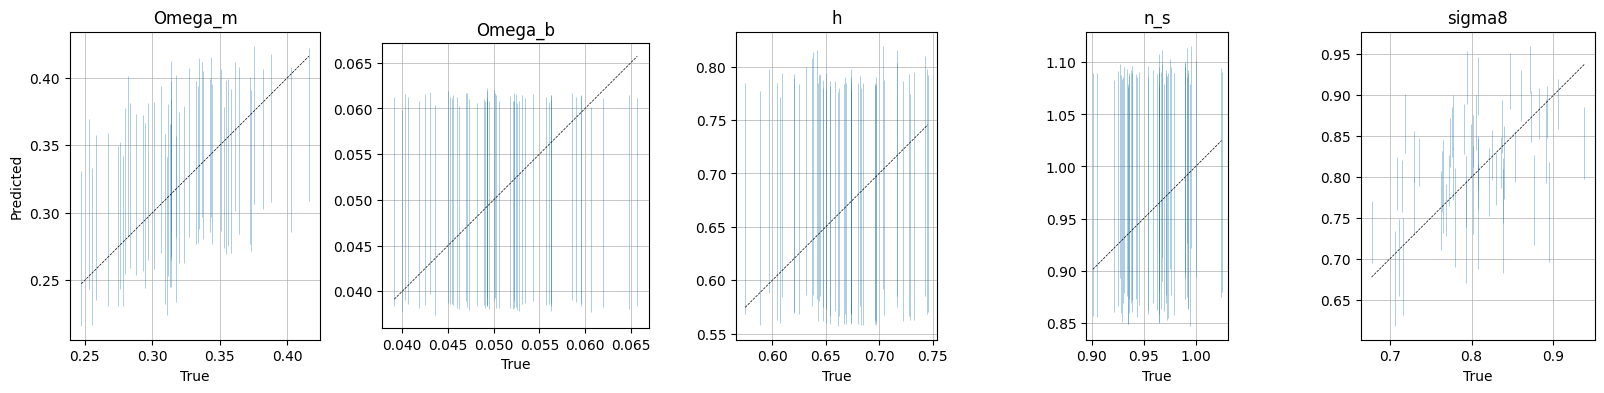

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


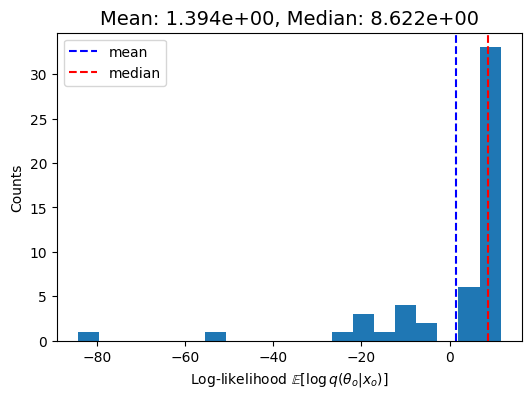

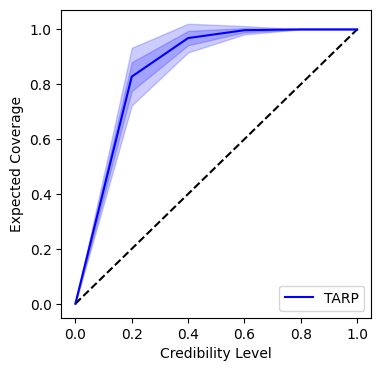

In [84]:
metric = PosteriorCoverage(
    num_samples=1000, sample_method='direct', 
    labels=['Omega_m', 'Omega_b', 'h', 'n_s', 'sigma8'],
    plot_list = ["coverage", "histogram", "predictions", "tarp", "logprob"],
    out_dir=None
)
metric(posterior=_p, x=xobs, theta=cosmotest);

In [85]:
metric = PosteriorSamples(
    num_samples=10000, sample_method='direct',
)
samps = metric(posterior=_p, x=xobs, theta=cosmotest);

100%|██████████| 52/52 [02:26<00:00,  2.82s/it]


In [86]:
mu = np.median(samps,axis=0)
std = np.percentile(samps, q=[16, 84], axis=0)
std -= mu
std = np.abs(std)

Text(0, 0.5, 'Predicted $\\sigma_8$')

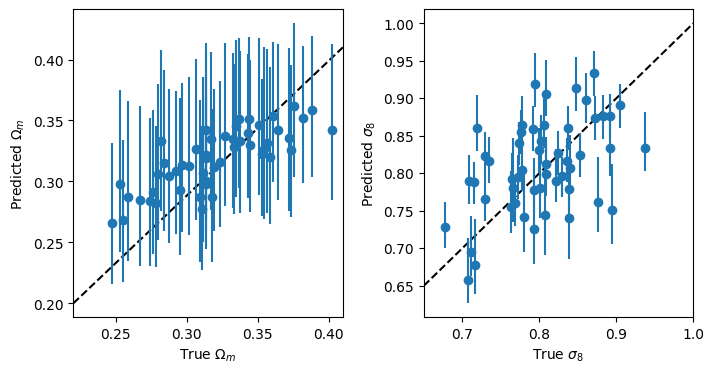

In [87]:
f, axs = plt.subplots(1,2, figsize=(8,4), gridspec_kw=dict(wspace=0.3))
axs[0].plot([0.22, 0.41], [0.2, 0.41], 'k--')
axs[0].errorbar(cosmotest[:,0], mu[:,0], yerr=std[...,0], fmt='o')
# axs[0].set_aspect('equal')
axs[0].set_xlim(0.22, 0.41)
axs[0].set_xlabel(r'True $\Omega_m$')
axs[0].set_ylabel(r'Predicted $\Omega_m$')


axs[1].plot([0.65, 1], [0.65, 1], 'k--')
axs[1].errorbar(cosmotest[:,4], mu[:,4], yerr=std[...,4], fmt='o')
# axs[1].set_aspect('equal')
axs[1].set_xlim(0.65, 1)
axs[1].set_xlabel(r'True $\sigma_8$')
axs[1].set_ylabel(r'Predicted $\sigma_8$')

## Scratch

### Compare CHARM across cosmologies

In [79]:
charm_path = '/anvil/scratch/x-mho1/cmass-ili/quijotelike/fastpm/L1000-N128'# 
quijote_path = '/anvil/scratch/x-mho1/cmass-ili/quijote/nbody/L1000-N128'

cPks = []
qPks = []
for lhid in tqdm(range(2000)):
    lhid = str(lhid)
    ck, cPk, ccosmo = get_halo_Pk(join(charm_path, lhid), a='0.666667')
    qk, qPk, qcosmo = get_halo_Pk(join(quijote_path, lhid), a='0.666667')
    cPks.append(cPk)
    qPks.append(qPk)
cPks, qPks = map(np.stack, [cPks, qPks])

100%|██████████| 2000/2000 [00:44<00:00, 45.01it/s]


(0.5, 1.5)

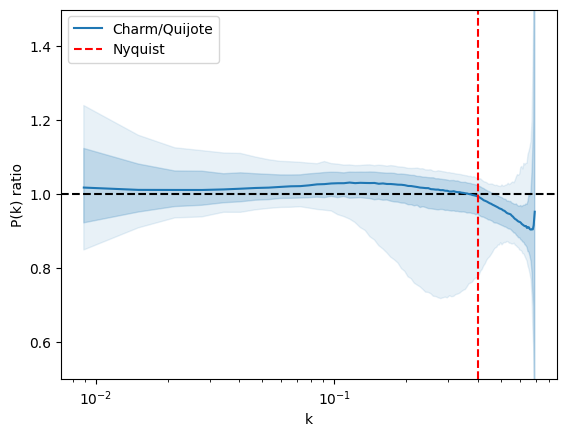

In [80]:
x1 = cPks[...,0]
x2 = qPks[...,0]
y = np.median(x1/x2, axis=0)
yerr = np.percentile(x1/x2, [5, 16, 84, 95], axis=0)
nyq = 2*np.pi/1000 * (128/2)
f, ax = plt.subplots()
ax.semilogx()
ax.axhline(1, c='k', ls='--')
ax.plot(ck, y, label='Charm/Quijote', c='C0')
ax.fill_between(ck, yerr[0], yerr[3], alpha=0.1, color='C0')
ax.fill_between(ck, yerr[1], yerr[2], alpha=0.2, color='C0')
ax.axvline(nyq, c='r', ls='--', label='Nyquist')
ax.legend()
ax.set(xlabel='k', ylabel='P(k) ratio')
ax.set_ylim(0.5,1.5)

In [77]:
file = join(quijote_path, '0', 'diag', 'halos.h5')
with h5py.File(file, 'r') as f:
    print(f['0.666667'].keys())
    qb = f['0.666667']['Pk_k'][...]
    qh = f['0.666667']['Pk'][...]
    
file = join(charm_path, '0', 'diag', 'halos.h5')
with h5py.File(file, 'r') as f:
    print(f['0.666667'].keys())
    cb = f['0.666667']['Pk_k'][...]
    ch = f['0.666667']['Pk'][...]

<KeysViewHDF5 ['Pk', 'Pk_k', 'mass_bins', 'mass_hist', 'zPk', 'zPk_k']>
<KeysViewHDF5 ['Pk', 'Pk_k', 'mass_bins', 'mass_hist', 'zPk', 'zPk_k']>


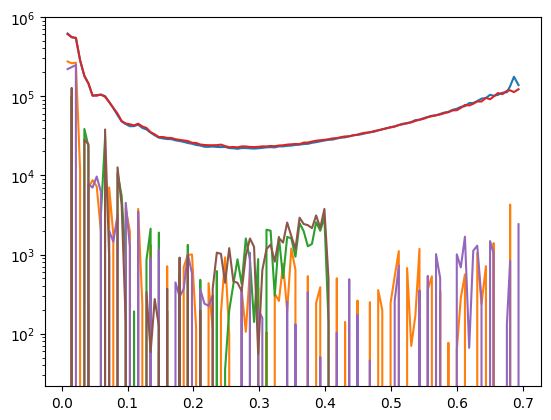

In [78]:
plt.semilogy()
plt.plot(qb[:], qh[...])
plt.plot(cb[:], ch[...])

## HOD constraints